In [1]:
import pandas as pd
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
import numpy as np

In [2]:
air = pd.read_csv('Tweets.csv')
important_words =['accessable', 'accomplished', 'adaptable', 'admiringly', 'adulation', 'advocated', 'affirmation', 'agility',
       'amazed', 'amiability', 'amusing', 'appreciated', 'articulate', 'astonished', 'attraction', 'available',
       'awesomely', 'beautifully', 'benefactor', 'best', 'blessing', 'bonus', 'brave', 'brighten', 'buoyant',
       'carefree', 'charisma', 'cheerful', 'clarity', 'cleared', 'colorful', 'commitment', 'complemented', 'confident',
       'constructive', 'convienient', 'correctly', 'courtly', 'cushy', 'dawn', 'dedicated', 'delicacy', 'deservedly',
       'dextrous', 'distinctive', 'doubtless', 'earnest', 'easy', 'ecstatic', 'efficiently', 'elatedly', 'eloquently',
       'enchanting', 'endorsement', 'enhanced', 'enlighten', 'enterprising', 'enthusiastic', 'enviably', 'eulogize',
       'exaltation', 'exceeding', 'excellent', 'excites', 'exonerate', 'exuberance', 'eyecatching', 'faithfulness',
       'fantastic', 'fast-paced', 'favorite', 'feisty', 'festive', 'first-in-class', 'flourish', 'formidable',
       'freedom', 'ftw', 'gainfully', 'generosity', 'gladden', 'glistening', 'god-given', 'goood', 'grand', 'gratitude',
       'gush', 'handily', 'hardier', 'healthy', 'helping', 'holy', 'hospitable', 'humorous', 'idyllic', 'immaculately',
       'impressed', 'improving', 'inexpensive', 'innocuous', 'instantly', 'intimacy', 'invigorate', 'irresistibly',
       'joyous', 'keenly', 'laudable', 'lean', 'lighter', 'lovable', 'low-price', 'luckiest', 'luxurious',
       'magnificently', 'marvelously', 'matchless', 'meritorious', 'meticulous', 'modern', 'neat', 'nobly', 'nurturing',
       'opulent', 'outshone', 'overtakes', 'pamperedly', 'patience', 'peach', 'permissible', 'playful', 'pleasure',
       'polished', 'powerfully', 'preferable', 'pretty', 'prodigious', 'profusion', 'promoter', 'prosperous', 'prowess',
       'qualify', 'raptureous', 'reaffirm', 'reclaim', 'recovery', 'reform', 'regally', 'reliable', 'renewed',
       'resourceful', 'restful', 'reverent', 'reward', 'righteously', 'rockstar', 'sagacity', 'satisfied', 'seamless',
       'sensation', 'sharp', 'simplest', 'skillful', 'smiles', 'snazzy', 'soothingly', 'speedily', 'splendor',
       'state-of-the-art', 'steadiness', 'straightforward', 'stunningly', 'sublime', 'succes', 'suitable', 'support',
       'supurbly', 'swankiest', 'talent', 'tenaciously', 'thoughtfully', 'thriving', 'titillatingly', 'tougher',
       'triumphal', 'trusting', 'unabashed', 'undaunted', 'unforgettable', 'unselfish', 'upliftingly', 'valor',
       'victorious', 'vivid', 'well', 'well-intentioned', 'well-wishers', 'willingness', 'wisely', 'woo', 'worthy',
       'zippy', 'abominably', 'abscond', 'abuses', 'accuse', 'achey', 'addict', 'adulterated', 'affront', 'aggrieved',
       'ailing', 'allegation', 'ambivalence', 'anger', 'annoyances', 'antagonize', 'antipathy', 'apathy',
       'apprehension', 'arrogance', 'aspersions', 'atrocity', 'authoritarian', 'aweful', 'back-woods', 'bad', 'bane',
       'barren', 'batty', 'beguile', 'belligerent', 'berserk', 'betraying', 'bias', 'biting', 'blame', 'blather',
       'blindingly', 'blotchy', 'blurry', 'bombard', 'botch', 'brainless', 'breach', 'brimstone', 'bruises', 'brute',
       'bulky', 'bum', 'bunk', 'busybody', 'callous', 'cannibalize', 'carp', 'catastrophe', 'chafe', 'chatterbox',
       'cheerless', 'chore', 'clogged', 'coerce', 'comical', 'complaint', 'conceit', 'condemnable', 'confessions',
       'confrontation', 'cons', 'consternation', 'contemptuously', 'contravene', 'corrupt', 'coupists', 'crafty',
       'crashes', 'creaking', 'cringe', 'criticism', 'crowded', 'crumble', 'culpable', 'cuss', 'damn', 'dark', 'dawdle',
       'death', 'debilitating', 'deceitfully', 'decline', 'defame', 'deficient', 'degeneration', 'dejectedly', 'delude',
       'demolisher', 'denial', 'denunciation', 'deprave', 'deprive', 'desertion', 'desperate', 'despondency', 'destroy',
       'detest', 'detracts', 'deviation', 'diabolic', 'die', 'dilly-dally', 'dirt', 'disadvantageous', 'disagreement',
       'disappointment', 'disasterous', 'discomfit', 'disconsolation', 'discountenance', 'discriminate', 'disgraceful',
       'disgustingly', 'disillusion', 'disintegrates', 'disloyalty', 'disobedience', 'disown', 'displaced', 'disquiet',
       'disrespectablity', 'dissappointed', 'dissembler', 'dissing', 'distaste', 'distraught', 'disturb',
       'divisiveness', 'domineer', 'doubts', 'downhearted', 'drag', 'drastically', 'drippy', 'drowning', 'dumb', 'dust',
       'egomania', 'embarrass', 'emphatically', 'engulf', 'entrapment', 'err', 'eschew', 'exagerate', 'excessive',
       'exhausted', 'expensive', 'expunge', 'extremism', 'failed', 'fallacies', 'falsehood', 'fanaticism', 'fascist',
       'fatally', 'fatuity', 'fearfully', 'felon', 'fibber', 'figurehead', 'flagrant', 'flare', 'fleed', 'flimflam',
       'fool', 'foreboding', 'forsaken', 'frail', 'freaking', 'frenzy', 'frighten', 'fruitless', 'fucking', 'funnily',
       'futile', 'galling', 'gawk', 'gibe', 'glibly', 'goad', 'grainy', 'grievances', 'grisly', 'grudge', 'grumpily',
       'hack', 'hampered', 'harassment', 'hardheaded', 'harpy', 'haste', 'hates', 'hazard', 'heartless', 'hedonistic',
       'hells', 'hideously', 'hoard', 'hopelessness', 'horrifying', 'hubris', 'hurted', 'hypocritical', 'idiotic',
       'ignore', 'ill-sorted', 'illiterate', 'imbecile', 'immoral', 'impeach', 'imperialist', 'impinge', 'impolitic',
       'impotent', 'improbability', 'impudently', 'inaccurate', 'inadvisably', 'incapable', 'inclement', 'incompatible',
       'incongruous', 'inconsistency', 'incorrigibly', 'indecorum', 'indignantly', 'indistinguishable',
       'ineffectualness', 'ineloquently', 'inescapably', 'inexpert', 'infection', 'infiltrators', 'infraction',
       'ingratitude', 'iniquitous', 'inopportune', 'insensitive', 'insincerity', 'instability', 'insufficiency',
       'insupportably', 'intermittent', 'intolerance', 'invader', 'invisible', 'irks', 'irragularity', 'irrecoverably',
       'irrepressible', 'irritant', 'issues', 'jealous', 'jerk', 'judder', 'kill', 'kook', 'laconic', 'lame-duck',
       'lapse', 'lawbreaking', 'leaks', 'lemon', 'lewdness', 'lier', 'listless', 'loathsomely', 'loophole', 'loss',
       'ludicrous', 'lurid', 'madly', 'malevolence', 'maltreatment', 'manipulation', 'massacres', 'meddlesome',
       'mendacious', 'midget', 'misapprehend', 'mischievous', 'miserably', 'misguided', 'misleadingly', 'miss',
       'mistress', 'moan', 'molestation', 'mope', 'mortified', 'muddy', 'murky', 'nagging', 'nauseating', 'negate',
       'nepotism', 'nightmare', 'nonexistent', 'obese', 'obnoxiously', 'obsessively', 'obstructs', 'oddities',
       'offensively', 'onslaught', 'oppressively', 'outcry', 'over-acted', 'overbalanced', 'overloaded', 'overshadow',
       'overstatements', 'overwhelmingly', 'pale', 'panicked', 'pariah', 'patronize', 'peeved', 'perilously',
       'pertinaciously', 'perverted', 'petty', 'pigs', 'pitilessly', 'plight', 'poisonously', 'poor', 'prattle',
       'prejudicial', 'pretentious', 'primitive', 'profanity', 'protesting', 'punch', 'puzzling', 'quash', 'racy',
       'rampage', 'rants', 'ravage', 'reckless', 'refuses', 'regret', 'rejecting', 'remorse', 'reprehensible',
       'reprove', 'repulsing', 'restless', 'retarded', 'revert', 'rhetoric', 'rigid', 'risks', 'rough', 'ruinous',
       'rust', 'sacrificed', 'salacious', 'satirize', 'scandalized', 'scarcely', 'scathing', 'scorchingly',
       'scrambling', 'screwed-up', 'seedy', 'self-serving', 'seriousness', 'shabby', 'shamefully', 'shimmy', 'shoddy',
       'shrew', 'sick', 'silly', 'skeletons', 'skulk', 'slaughtered', 'sloooow', 'slower', 'slumpping', 'smelled',
       'smoulder', 'smuttiest', 'snarl', 'snobish', 'somber', 'spade', 'spite', 'spoiled', 'spoonfed', 'squeak',
       'stagnation', 'standstill', 'stealing', 'sticky', 'stingingly', 'straggle', 'streaky', 'stridently', 'strut',
       'stumped', 'stupify', 'subjected', 'substandard', 'sucks', 'suffering', 'sully', 'suppress', 'swamped', 'taboo',
       'tanks', 'tauntingly', 'temper', 'tepid', 'tetchily', 'threat', 'thug', 'tingled', 'torment', 'totalitarian',
       'tragically', 'trapped', 'travesty', 'trivial', 'truant', 'two-faced', 'ugly', 'unaccessible', 'unbearablely',
       'uncomfortable', 'unconvincingly', 'undercutting', 'undersized', 'uneasily', 'unexpectedly', 'unforeseen',
       'unhappily', 'uninsured', 'unkindly', 'unlucky', 'unnoticed', 'unprofitable', 'unreadable', 'unrest',
       'unsettled', 'unsteadily', 'untenable', 'unusably', 'unwell', 'upbraid', 'upseting', 'vague', 'vengefulness',
       'vibrate', 'vile', 'vindictive', 'virulence', 'vomiting', 'war-like', 'waste', 'weakening', 'weird', 'wicked',
       'wobble', 'worried', 'worsening', 'wreaked', 'wrinkled', 'yawn']

In [3]:
#get rid of the common words
s = set(stopwords.words('english'))

def remove_stopwords(input):
    return [i for i in input.lower().split() if i not in s]
   # print [y for x in y if y not in list(s)]

air['cleansed_text'] = air['text'].apply(lambda x: remove_stopwords(x))
print (air.head())

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

In [4]:
air.columns.values

array(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone', 'cleansed_text'], dtype=object)

In [5]:
#
#discard all neutrals
#
import sys
non_neutrals = ['positive','negative']
air_non_neutral = air[air.airline_sentiment != 'neutral']
air_non_neutral['sentiment'] = air_non_neutral['airline_sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
#print air_non_nuetral['text']

#words = air_non_nuetral['cleansed_text'].to_numpy()
#important_words =  [item for sublist in words for item in sublist]

/Users/izzyqiu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [6]:
print (len(air_non_neutral))

11541


/Users/izzyqiu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/izzyqiu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Score is  0.802014513159
0.800259965338


/Users/izzyqiu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


=====TOP  POSITIVE WORDS========
                0  coefficients
68   faithfulness      2.284236
70     fast-paced      2.237086
62      exceeding      2.197440
19     benefactor      1.801609
84          goood      1.425535
11        amusing      1.155396
130       playful      1.123231
144       reclaim      1.123231
91        helping      1.123231
96   immaculately      1.005348
====TOP 10 NEGATIVE WORDS=======
                0  coefficients
380     fruitless     -0.730726
582         shrew     -0.731135
225    back-woods     -0.833395
504      nepotism     -0.892612
614   substandard     -1.024888
492  misleadingly     -1.105229
357     extremism     -1.210216
262       comical     -1.212690
534   poisonously     -1.635191
15     attraction     -1.750768


<Container object of 10 artists>

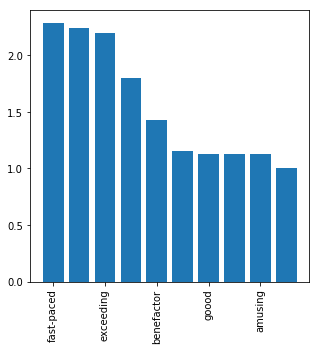

In [7]:
for word in important_words:
    #print word
    air_non_neutral[word] = air_non_neutral['cleansed_text'].apply(lambda s: s.count(word))

train_data = air_non_neutral.sample(frac=.8)
validation_data = air_non_neutral.drop(train_data.index)
#print len (validation_data.columns)
#print len(train_data.columns)

train_data['intercept']=1
validation_data['intercept']=1

#print len (validation_data.columns)
#print len(train_data.columns)
#
# feature_matrix is the new column we added (the important words)
#
feature_matrix = train_data.ix[:,17:len(train_data)]
sentiment = train_data['sentiment']


#
logreg = LogisticRegression()

logreg.fit(feature_matrix, sentiment)

#what is the accuracy on training 
score = logreg.score(feature_matrix, sentiment)
print ("Score is ", score)

# accuracy on validation data
feature_matrix_valid  = validation_data.ix[:,17:len(validation_data)]

sentiment_valid  = validation_data['sentiment']

#print len (validation_data.columns)
#print len(train_data.columns)

score2 = logreg.score(feature_matrix_valid, sentiment_valid)
print (score2)


result = pd.DataFrame(['intercept'] + important_words)

#result['coefficients'] = pd.Series(logreg.coef_.T.flatten(), index = result.index)
result['coefficients'] = pd.Series(logreg.coef_.T.flatten())

#print result.shape
#pd.concat([result,coeffs], axis=1)
sorted_results = result.sort_values(by='coefficients', ascending=False)

import matplotlib.pyplot as plt

#print sorted_results[['coefficients']]
sorted_results['coefficients']= sorted_results['coefficients'].apply(lambda x:  float(x))
print ("=====TOP  POSITIVE WORDS========")
print (sorted_results.head(10))
print ("====TOP 10 NEGATIVE WORDS=======")
print (sorted_results.tail(10))
#print sorted_results[['coefficients']].head()
#print sorted_results.iloc[:,0]
#print sorted_results.head()

%matplotlib inline
from pylab import rcParams
#print sorted_results.iloc[1:10,0]
#plt.figure(figsize=(10,10))
rcParams['figure.figsize'] = 5,5
#plt.subplot(211)
fig, ax = plt.subplots()
#ax.set_yticklabels(sorted_results.iloc[:,0])
ax.set_xticklabels(sorted_results.iloc[0:10][0].values,rotation="90",ha='center')
#print (type(sorted_results.iloc[0:10,1))
#print (sorted_results[[1]])
#plt.bar(range(len(sorted_results)), sorted_results[['coefficients']].values)
#plt.bar(sorted_results[['coefficients']].values,sorted_results.iloc[:,1])
#plt.barh(range(len(sorted_results.iloc[1:10,1])),sorted_results.iloc[1:10,1])
ax.bar(range(10),sorted_results.iloc[0:10]['coefficients'])


## another way to do this

In [8]:
air.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  \
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)   
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)   
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)   
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)   
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)   

                                       cleansed_text  
0                 [@virginamerica, @dhepburn, said.]  
1  [@virginamerica, plus, you've, added, commerci...  
2  [@virginamerica, didn't, today..., must, mean,...  
3  [@virginamerica, it's, really, aggressive, bla...  
4    [@virginamerica, it's, really, big, bad, thing]

In [10]:
dff = air.groupby(['airline','airline_sentiment']).count()['name']
dff

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
Name: name, dtype: int64

In [11]:
df_companySentiment = dff.to_frame().reset_index()
df_companySentiment.columns = ["airline", "airline_sentiment", "count"]
df_companySentiment

airline airline_sentiment  count
0         American          negative   1960
1         American           neutral    463
2         American          positive    336
3            Delta          negative    955
4            Delta           neutral    723
5            Delta          positive    544
6        Southwest          negative   1186
7        Southwest           neutral    664
8        Southwest          positive    570
9       US Airways          negative   2263
10      US Airways           neutral    381
11      US Airways          positive    269
12          United          negative   2633
13          United           neutral    697
14          United          positive    492
15  Virgin America          negative    181
16  Virgin America           neutral    171
17  Virgin America          positive    152

In [12]:
# company to be index
df2 = df_companySentiment
df2.index = df2['airline']
del df2['airline']
df2

airline_sentiment  count
airline                                
American                negative   1960
American                 neutral    463
American                positive    336
Delta                   negative    955
Delta                    neutral    723
Delta                   positive    544
Southwest               negative   1186
Southwest                neutral    664
Southwest               positive    570
US Airways              negative   2263
US Airways               neutral    381
US Airways              positive    269
United                  negative   2633
United                   neutral    697
United                  positive    492
Virgin America          negative    181
Virgin America           neutral    171
Virgin America          positive    152

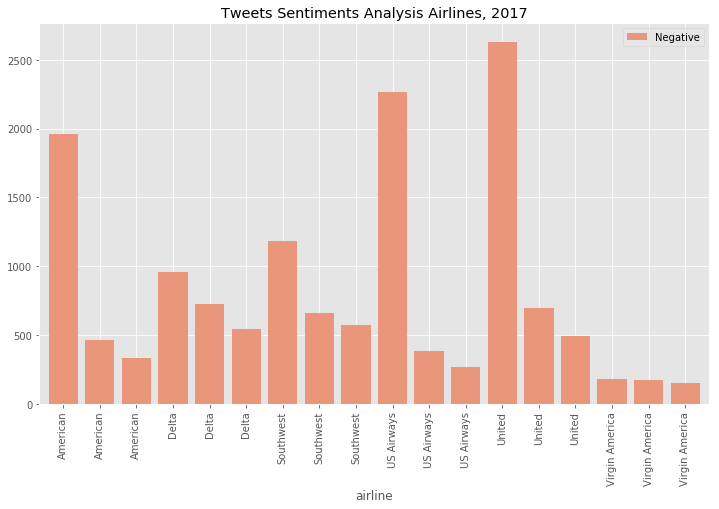

In [15]:
import matplotlib.style
from matplotlib.pyplot import subplots
matplotlib.style.use('ggplot')

fig, ax = subplots()
my_colors =['darksalmon', 'papayawhip', 'cornflowerblue']
df2.plot(kind='bar', stacked=True, ax=ax, color=my_colors, figsize=(12, 7), width=0.8)
ax.legend(["Negative", "Neutral", "Positive"])
plt.title("Tweets Sentiments Analysis Airlines, 2017")
plt.show()

# focus on negative, prepocessing

In [17]:
# remove the first two tokens as they always contain 
#"@ airline_name". We begin by defining our normalization function
import re, nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def normalizer(tweet):
    only_letters = re.sub("[^a-zA-Z]", " ",tweet) 
    tokens = nltk.word_tokenize(only_letters)[2:]
    lower_case = [l.lower() for l in tokens]
    filtered_result = list(filter(lambda l: l not in s, lower_case))
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result]
    return lemmas



In [18]:
# for test
normalizer("I recently drank some water.")

['drank', 'water']

In [19]:
pd.set_option('display.max_colwidth', -1) # Setting this so we can see the full content of cells
air['normalized_tweet'] = air.text.apply(normalizer)
air[['text','normalized_tweet']].head()

text  \
0  @VirginAmerica What @dhepburn said.                                                                                              
1  @VirginAmerica plus you've added commercials to the experience... tacky.                                                         
2  @VirginAmerica I didn't today... Must mean I need to take another trip!                                                          
3  @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse   
4  @VirginAmerica and it's a really big bad thing about it                                                                          

                                                                            normalized_tweet  
0  [dhepburn, said]                                                                           
1  [added, commercial, experience, tacky]                                                     
2  [today, must, mean, need, take, another, trip]                                             
3  [really, aggressive, blast, obnoxious, entertainment, guest, face, amp, little, recourse]  
4  [really, big, bad, thing]

In [20]:
from nltk import ngrams
def ngrams(input_list):
    #onegrams = input_list
    bigrams = [' '.join(t) for t in list(zip(input_list, input_list[1:]))]
    trigrams = [' '.join(t) for t in list(zip(input_list, input_list[1:], input_list[2:]))]
    return bigrams+trigrams
air['grams'] = air.normalized_tweet.apply(ngrams)
air[['grams']].head()

grams
0  [dhepburn said]                                                                                                                                                                                                                                                                                                                                           
1  [added commercial, commercial experience, experience tacky, added commercial experience, commercial experience tacky]                                                                                                                                                                                                                                     
2  [today must, must mean, mean need, need take, take another, another trip, today must mean, must mean need, mean need take, need take another, take another trip]                                                                                                                                                                                          
3  [really aggressive, aggressive blast, blast obnoxious, obnoxious entertainment, entertainment guest, guest face, face amp, amp little, little recourse, really aggressive blast, aggressive blast obnoxious, blast obnoxious entertainment, obnoxious entertainment guest, entertainment guest face, guest face amp, face amp little, amp little recourse]
4  [really big, big bad, bad thing, really big bad, big bad thing]

In [21]:
# counting words
import collections
def count_words(input):
    cnt = collections.Counter()
    for row in input:
        for word in row:
            cnt[word] += 1
    return cnt
air[(air.airline_sentiment == 'negative')][['grams']].apply(count_words)['grams'].most_common(20)

[('http co', 449),
 ('customer service', 438),
 ('cancelled flightled', 425),
 ('late flight', 215),
 ('cancelled flighted', 196),
 ('flight cancelled', 185),
 ('late flightr', 144),
 ('cancelled flight', 131),
 ('hold hour', 128),
 ('flightled flight', 123),
 ('flight cancelled flightled', 117),
 ('flight delayed', 115),
 ('cancelled flightled flight', 107),
 ('call back', 106),
 ('booking problem', 98),
 ('gate agent', 83),
 ('flight flight', 74),
 ('hour late', 69),
 ('delayed flight', 69),
 ('flight attendant', 60)]

In [22]:
# positive counts
air[(air.airline_sentiment == 'positive')][['grams']].apply(count_words)['grams'].most_common(20)

[('http co', 233),
 ('customer service', 91),
 ('flight attendant', 25),
 ('quick response', 19),
 ('great flight', 17),
 ('best airline', 16),
 ('great job', 16),
 ('great service', 16),
 ('gate agent', 16),
 ('booking problem', 15),
 ('thanks help', 15),
 ('thank much', 15),
 ('good work', 14),
 ('fleet fleek', 14),
 ('fleek http', 14),
 ('fleet fleek http', 14),
 ('fleek http co', 14),
 ('guy rock', 13),
 ('looking forward', 13),
 ('great customer', 12)]

## bow svm
Lets start simple with a bag-of-words Support-Vector-Machine (SVM) classifier. Bag-of-words means that we represent each sentence by the unique words in it. To make this representation useful for our SVM classifier we transform each sentence into a vector. The vector is of the same length as our vocabulary, i.e. the list of all words observed in our training data, with each word representing an entry in the vector. If a particular word is present, that entry in the vector is 1, otherwise 0.

To create these vectors we use the CountVectorizer from sklearn.

In [23]:
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(ngram_range=(1,2))

In [24]:
vectorized_data = count_vectorizer.fit_transform(air.text)
indexed_data = hstack((np.array(range(0,vectorized_data.shape[0]))[:,None], vectorized_data))

In [25]:
def sentiment2target(sentiment):
    return {
        'negative': 0,
        'neutral': 1,
        'positive' : 2
    }[sentiment]
targets = air.airline_sentiment.apply(sentiment2target)

In [26]:
# split test and train
from sklearn.model_selection import train_test_split
data_train, data_test, targets_train, targets_test = train_test_split(indexed_data, targets, test_size=0.4, random_state=0)
data_train_index = data_train[:,0]
data_train = data_train[:,1:]
data_test_index = data_test[:,0]
data_test = data_test[:,1:]

In [27]:
# fit the classifier
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(svm.SVC(gamma=0.01, C=100., probability=True, class_weight='balanced', kernel='linear'))
clf_output = clf.fit(data_train, targets_train)

In [28]:
clf.score(data_test, targets_test)

0.78517759562841527

In [29]:
sentences = count_vectorizer.transform([
    "What a great airline, the trip was a pleasure!",
    "My issue was quickly resolved after calling customer support. Thanks!",
    "What the hell! My flight was cancelled again. This sucks!",
    "Service was awful. I'll never fly with you again.",
    "You fuckers lost my luggage. Never again!",
    "I have mixed feelings about airlines. I don't know what I think.",
    ""
])
clf.predict_proba(sentences)
# are not impressive

array([[ 0.20841994,  0.05582584,  0.73575422],
       [ 0.14100194,  0.06774124,  0.79125683],
       [ 0.94543122,  0.03730068,  0.01726809],
       [ 0.89342827,  0.0694542 ,  0.03711753],
       [ 0.97518305,  0.01569054,  0.0091264 ],
       [ 0.4643903 ,  0.50490793,  0.03070176],
       [ 0.26292292,  0.52473131,  0.21234576]])

In [30]:
# challenge for classifier
predictions_on_test_data = clf.predict_proba(data_test)
index = np.transpose(np.array([range(0,len(predictions_on_test_data))]))
indexed_predictions = np.concatenate((predictions_on_test_data, index), axis=1).tolist()

In [31]:
def margin(p):
    top2 = p.argsort()[::-1]
    return abs(p[top2[0]]-p[top2[1]])
margin = sorted(list(map(lambda p : [margin(np.array(p[0:3])),p[3]], indexed_predictions)), key=lambda p : p[0])
list(map(lambda p : air.iloc[data_test_index[int(p[1])].toarray()[0][0]].text, margin[0:10]))

['@JetBlue - Definitely no note from whoever stole from me.',
 '@AmericanAir overall lack of attention or foresight when managing flights.',
 '@USAirways thanks. We did see an agent. Unhelpful. Some got vouchers others did not for unexplained reasons.',
 '@SouthwestAir @karajusto SWA is willing to follow up. FINALLY.',
 '.@JetBlue this is enough for me to stop flying JetBlue.',
 '@SouthwestAir I am but it says yall are sold out. Me &amp; My coworkers would need to get out first available',
 '@AmericanAir At what e-mail adress can I send your CEO Mr. Doug Parker a letter that he hopefully reads?',
 '@SouthwestAir hot stewardess flipped me off',
 '@united thx. Come hell or high water...',
 "@united I have flights that don't appear to have been applied to my MileagePlus account. Can you help?"]

In [36]:
#positive
list(map(lambda p : predictions_on_test_data[int(p[1])], margin[0:10]))

[array([ 0.47135989,  0.05728023,  0.47135989]),
 array([ 0.48687168,  0.48729911,  0.02582921]),
 array([ 0.49538207,  0.00868911,  0.49592882]),
 array([ 0.37876212,  0.2416003 ,  0.37963758]),
 array([ 0.31952783,  0.34090853,  0.33956364]),
 array([ 0.49842077,  0.49987907,  0.00170016]),
 array([ 0.49405761,  0.49255486,  0.01338753]),
 array([ 0.28995584,  0.3542665 ,  0.35577765]),
 array([ 0.37849358,  0.24137135,  0.38013507]),
 array([ 0.49672074,  0.4984258 ,  0.00485346])]

In [34]:
list(map(lambda p : air.iloc[data_test_index[int(p[1])].toarray()[0][0]].text, margin[-10:]))

['@united here we go again. 2 of 3 segments SFO--New York RT were delayed OVER 2 hrs each! Why do you suck so BAD!?!Maybe another line of bus?',
 '@USAirways Been stuck for 40+ minutes due to lavatory issues. No beverages. No snacks. No customer service. Flt 645 to PHO... #fail #refund',
 '@united is the worst airline. Lost my luggage delayed my flights and has been very unaccomidating',
 '@AmericanAir Worst airline ever. We have been stranded for 24 hours because of your 7 hour delay with flight 104 last night.',
 "@USAirways seriously???  did you not see that I've spent 2 days - for multiple hours on hold just to have to hang up after the hours?",
 '@AmericanAir AA 1657 was also over an hour Late Flight to depart Ohare and now we have no luggage. Not happy standing in a long line at baggage svc',
 '@USAirways waited for 3 hours NO LUGGAGE line too long left airport when flight Cancelled Flighted WHERE does luggage GO? On hold for 1 hour so far',
 '@united you are the worst airline in

In [35]:
# negative
list(map(lambda p : predictions_on_test_data[int(p[1])], margin[-10:]))

[array([ 0.99752644,  0.00146632,  0.00100725]),
 array([  9.98064588e-01,   1.12867342e-03,   8.06738239e-04]),
 array([  9.98189138e-01,   1.24013441e-03,   5.70727842e-04]),
 array([  9.98866428e-01,   9.40411126e-04,   1.93161165e-04]),
 array([  9.98951474e-01,   9.81975237e-04,   6.65509801e-05]),
 array([  9.98828528e-01,   5.99355492e-04,   5.72116745e-04]),
 array([  9.99144137e-01,   7.68657243e-04,   8.72058438e-05]),
 array([  9.99223207e-01,   1.64721214e-04,   6.12071548e-04]),
 array([  9.99136078e-01,   4.91711174e-04,   3.72211030e-04]),
 array([  9.99519126e-01,   2.88828920e-04,   1.92044886e-04])]

negative performs better than positive

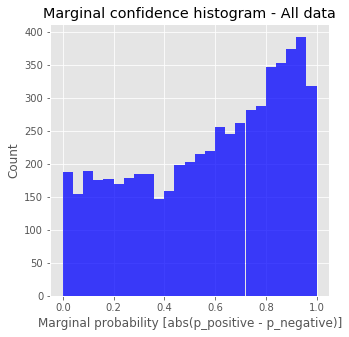

In [37]:
import matplotlib.pyplot as plt
marginal_probs = list(map(lambda p : p[0], margin))
n, bins, patches = plt.hist(marginal_probs, 25, facecolor='blue', alpha=0.75)
plt.title('Marginal confidence histogram - All data')
plt.ylabel('Count')
plt.xlabel('Marginal probability [abs(p_positive - p_negative)]')
plt.show()

### positive

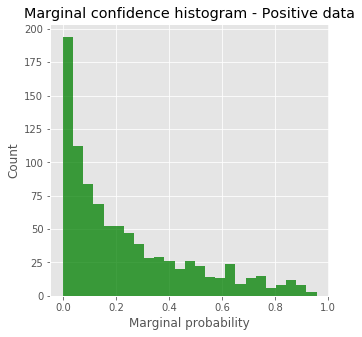

In [38]:
positive_test_data = list(filter(lambda row : row[0]==2, hstack((targets_test[:,None], data_test)).toarray()))
positive_probs = clf.predict_proba(list(map(lambda r : r[1:], positive_test_data)))
marginal_positive_probs = list(map(lambda p : abs(p[0]-p[1]), positive_probs))
n, bins, patches = plt.hist(marginal_positive_probs, 25, facecolor='green', alpha=0.75)
plt.title('Marginal confidence histogram - Positive data')
plt.ylabel('Count')
plt.xlabel('Marginal probability')
plt.show()

## neutral

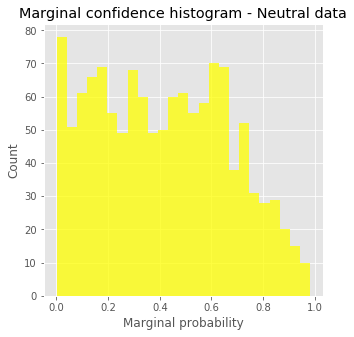

In [40]:
# row[0]==1
positive_test_data = list(filter(lambda row : row[0]==1, hstack((targets_test[:,None], data_test)).toarray()))
positive_probs = clf.predict_proba(list(map(lambda r : r[1:], positive_test_data)))
marginal_positive_probs = list(map(lambda p : abs(p[0]-p[1]), positive_probs))
n, bins, patches = plt.hist(marginal_positive_probs, 25, facecolor='yellow', alpha=0.75)
plt.title('Marginal confidence histogram - Neutral data')
plt.ylabel('Count')
plt.xlabel('Marginal probability')
plt.show()

### negative

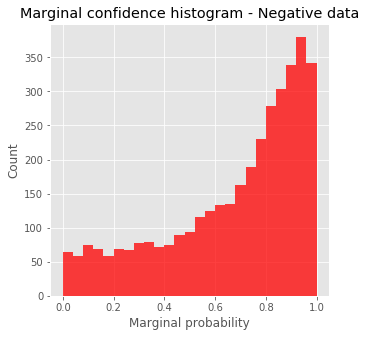

In [41]:
# row[0]==0
negative_test_data = list(filter(lambda row : row[0]==0, hstack((targets_test[:,None], data_test)).toarray()))
negative_probs = clf.predict_proba(list(map(lambda r : r[1:], negative_test_data)))
marginal_negative_probs = list(map(lambda p : abs(p[0]-p[1]), negative_probs))
n, bins, patches = plt.hist(marginal_negative_probs, 25, facecolor='red', alpha=0.75)
plt.title('Marginal confidence histogram - Negative data')
plt.ylabel('Count')
plt.xlabel('Marginal probability')
plt.show()

improvement for handling with positive data

###  Convolutional Neural Network¶
A good resource for learning about Deep Learning (and machine learning in general) is Christopher Olah's blog. The convolution neural network approach in particular is explained nicely in this post by WildML. 

#### Word Embeddings
Word embeddings, or vector representations of words, are critical to building a CNN classifier. The vector representations of words are what will build up our input matrix. These vector space models represent words in a vector space such that similar words are mapped to nearby points. 

In [42]:
# Set values for various parameters
num_features = 300    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 7           # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

In [45]:
from gensim.models import word2vec
model = word2vec.Word2Vec(air.normalized_tweet, workers=num_workers, \
                          size=num_features, min_count = min_word_count, \
                          window = context, sample = downsampling)
model.init_sims(replace=True)

/Users/izzyqiu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


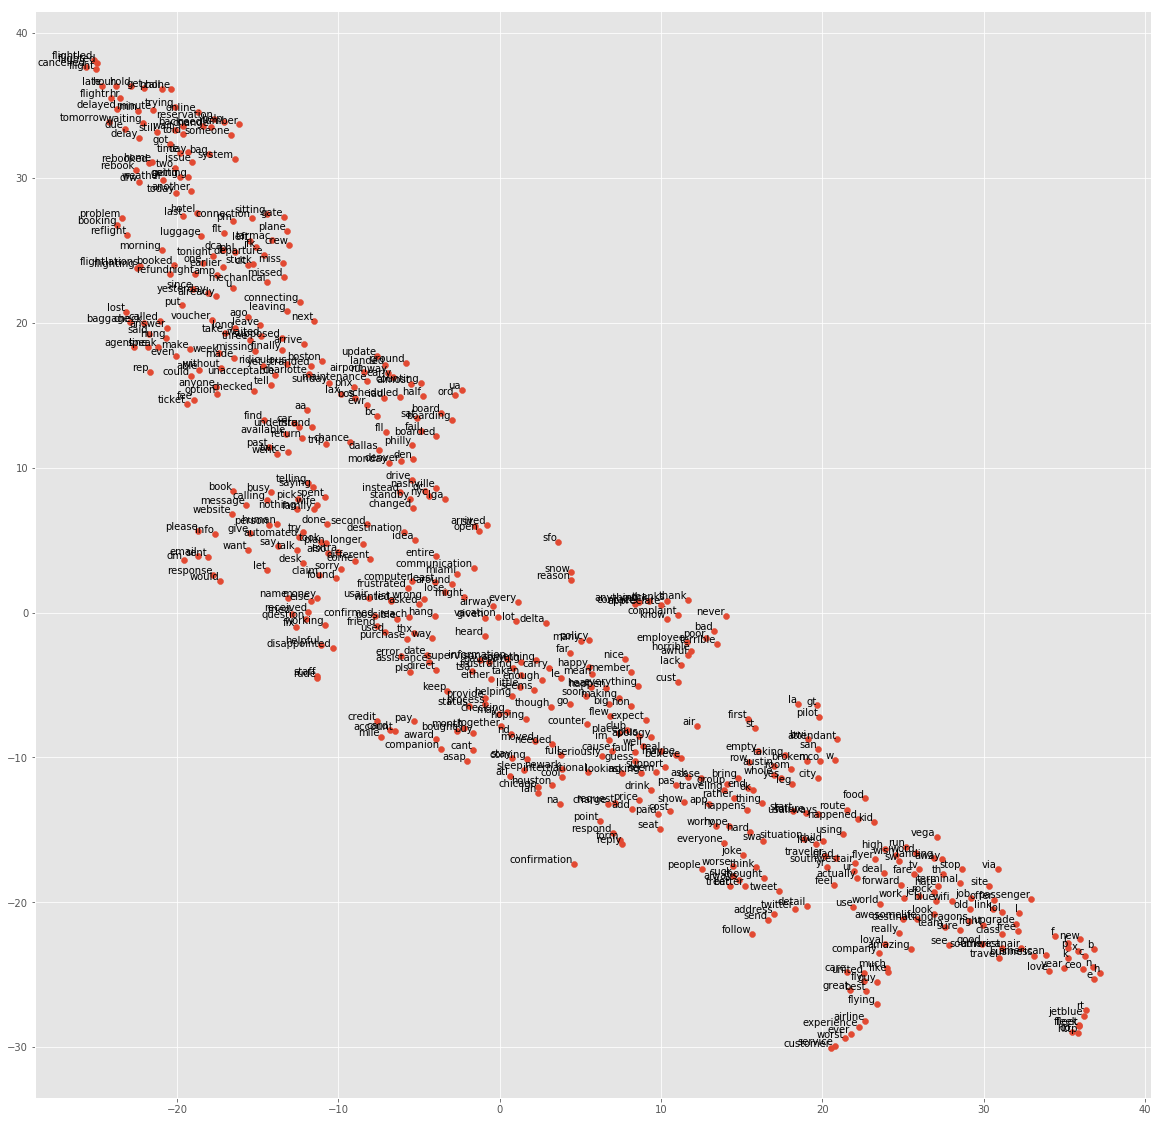

In [46]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
X = model[model.wv.vocab]
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
plt.rcParams["figure.figsize"] = (20,20)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
labels = list(model.wv.vocab.keys())
for label, x, y in zip(labels, X_tsne[:, 0], X_tsne[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-1, -1),
        textcoords='offset points', ha='right', va='bottom')

plt.show()